In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
918,VH1,ENTERTAINMENT,4.1,27424,17M,"1,000,000+",Free,0,Teen,Entertainment,"July 8, 2018",11.45.0,4.4 and up
1787,Hello Stars,GAME,4.6,101686,31M,"10,000,000+",Free,0,Everyone,Puzzle,"August 4, 2018",1.8.2,4.1 and up
10689,Alarm.fo – choose your info,SOCIAL,4.4,19,3.1M,"1,000+",Free,0,Everyone,Social,"May 29, 2018",1.4.8,4.1 and up
10641,WSVN - 7 News Miami,NEWS_AND_MAGAZINES,4.5,3320,14M,"100,000+",Free,0,Everyone,News & Magazines,"August 3, 2018",v4.30.0.9,5.0 and up
3023,NBC Sports Gold,SPORTS,2.9,3017,24M,"100,000+",Free,0,Everyone,Sports,"July 2, 2018",3.7,4.1 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


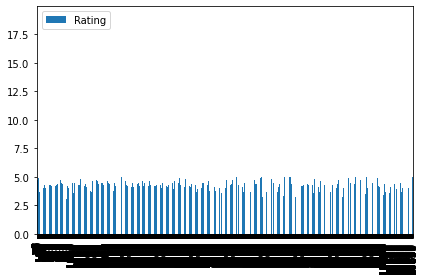

In [9]:
df.plot(kind="bar")
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Frequency'>

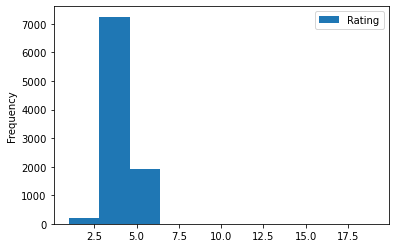

In [8]:
df.plot.hist()

In [ ]:
df.column().values()

In [ ]:
df['Category'].plot(kind='hist',figsize=(10,4))

In [23]:
df['Rating'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool

In [26]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [27]:
df.dropna(inplace=True)

<AxesSubplot:ylabel='Frequency'>

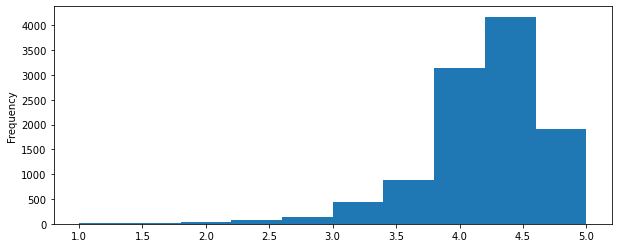

In [28]:
df['Rating'].plot(kind='hist',figsize=(10,4))

<AxesSubplot:>

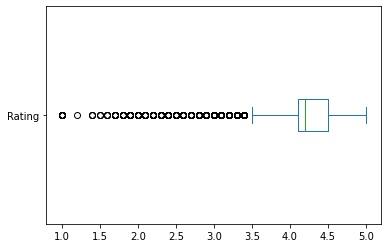

In [29]:
df['Rating'].plot(kind='box', vert=False)

In [18]:
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [30]:
df.loc[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [31]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [32]:
df['Review Num'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [35]:
len(df['Review Num'].isna()==False)

10829

In [36]:
df.loc[df['Review Num'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review Num


In [39]:
df.loc[df.duplicated(subset=['App'],keep=False)].sort_values(by='App').head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review Num
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,12
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,12
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,11506
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,11506
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,666521
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,666246


In [42]:
df.duplicated(keep=False).sum()

893

In [45]:
df.drop_duplicates(subset='App',keep='last', inplace=True)

In [52]:
df['Category'].value_counts()

Family                 1902
Game                    926
Tools                   827
Business                419
Medical                 396
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  327
Communication           316
Health_and_fitness      287
Photography             281
News_and_magazines      254
Social                  239
Books_and_reference     221
Travel_and_local        219
Shopping                202
Dating                  170
Video_players           163
Maps_and_navigation     131
Food_and_drink          112
Education               102
Auto_and_vehicles        85
Libraries_and_demo       83
Entertainment            79
Weather                  79
House_and_home           73
Events                   64
Parenting                60
Art_and_design           60
Comics                   56
Beauty                   53
Name: Category, dtype: int64

In [50]:
df['Category'] =df['Category'].str.replace("",'')

In [51]:
df['Category'] =df['Category'].str.capitalize()

In [57]:
df.loc[df['Price'].str.contains('$')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review Num
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_and_design,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_and_design,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510
3,Sketch - Draw & Paint,Art_and_design,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644
4,Pixel Draw - Number Art Coloring Book,Art_and_design,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967
5,Paper flowers instructions,Art_and_design,4.400000,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,38
10837,Fr. Mike Schmitz Audio Teachings,Family,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,4
10838,Parkinson Exercices FR,Medical,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,3
10839,The SCP Foundation DB fr nn5n,Books_and_reference,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,114


In [58]:
df.loc[df['Price']=='FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review Num


In [4]:
df_subset = df.loc[ [i for i in range(5,10)],[ 'App' , 'Category' , 'Rating' , 'Reviews']]

In [5]:
df_subset

,App,Category,Rating,Reviews
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178
7,Infinite Painter,ART_AND_DESIGN,4.1,36815
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121


In [13]:
#New fabricated data from book
matrix_data = np.matrix(

    '22,66,140;42,70,148;30,62,125;35,68,160;25,62,152')

In [14]:
row_labels = ['A','B','C','D','E']

In [15]:
column_headings = ['Age', 'Height', 'Weight']

In [16]:
df1 = pd.DataFrame(data=matrix_data,

                   index=row_labels,

                   columns=column_headings)

In [17]:
print("\nThe DataFrame\n",'-'*25, sep='')

print(df1)


The DataFrame
-------------------------
   Age  Height  Weight
A   22      66     140
B   42      70     148
C   30      62     125
D   35      68     160
E   25      62     152


In [18]:
print(df1.reset_index(drop=True))

   Age  Height  Weight
0   22      66     140
1   42      70     148
2   30      62     125
3   35      68     160
4   25      62     152


In [23]:
byReview = df_subset.groupby('Reviews')

In [26]:
byReview

In [27]:
byApp.sum()

,Rating
App,
Garden Coloring Book,4.4
Infinite Painter,4.1
Kids Paint Free - Drawing Fun,4.7
Paper flowers instructions,4.4
Smoke Effect Photo Maker - Smoke Editor,3.8


In [29]:
byReview.sum()

,Rating
Reviews,
121,4.7
13791,4.4
167,4.4
178,3.8
36815,4.1


In [31]:
df.sample(frac=0.1, replace=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
4568,"360 Security - Free Antivirus, Booster, Cleaner",TOOLS,4.6,16771865,Varies with device,"100,000,000+",Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
4652,"See U - Random video chat, video chat",SOCIAL,4.1,568,27M,"100,000+",Free,0,Mature 17+,Social,"April 13, 2018",1.4.1,4.1 and up
10174,CNY Slots : Gong Xi Fa Cai 发财机,GAME,3.6,33,71M,"5,000+",Free,0,Teen,Casino,"June 6, 2017",1.2,4.0.3 and up
3138,Wisepilot for XPERIA™,TRAVEL_AND_LOCAL,3.7,21443,Varies with device,"5,000,000+",Free,0,Everyone,Travel & Local,"January 30, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,Remote Link (PC Remote),TOOLS,4.5,87055,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"January 3, 2017",Varies with device,Varies with device
10679,Solitaire+,GAME,4.6,11235,Varies with device,"100,000+",Paid,$2.99,Everyone,Card,"July 30, 2018",Varies with device,Varies with device
6115,Droid PRoCon BF3,TOOLS,3.5,412,2.6M,"5,000+",Paid,$0.99,Everyone,Tools,"March 12, 2015",2.2,3.0 and up
10654,Wallpapers FN Herstal FNP 9,PERSONALIZATION,NaN,0,11M,1+,Free,0,Teen,Personalization,"April 12, 2018",1.0,4.1 and up


In [33]:
def rating_higher(rating):
    if(rating<3):
        return "Low"
    elif price>3 and price<4:
        return "Medium"
    else:
        return "High"

In [39]:
#df_rating = df.sample(n=5)['Rating'].apply(lamda x:0.90*x if x>4
#smhw this is not workin

In [40]:
df_rating

547     4.4
9017    3.9
6882    4.2
5198    4.1
224     4.7
Name: Rating, dtype: float64